In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
og_data = pd.read_csv('financial_portfolio_data.csv')
data = og_data
data.head()

,Date,Asset,Price
0,2023-07-10,Bond B,385.64
1,2023-03-03,Stock B,297.20
2,2023-09-13,Bond B,75.98
3,2023-01-07,Bond B,356.34
4,2023-06-04,Stock A,260.05


In [3]:
data.shape

(500, 3)

In [4]:
data.dtypes

Date      object
Asset     object
Price    float64
dtype: object

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.dtypes

Date     datetime64[ns]
Asset            object
Price           float64
dtype: object

In [9]:
data['Asset'].value_counts()

Asset
Bond B         110
Bond A         109
Commodity A    106
Stock A        101
Stock B         74
Name: count, dtype: int64

In [18]:
asset_data = {}

for i in data['Asset'].unique():
    asset_data[i] = data[data['Asset'] == i]

asset_data['Bond A']

15    2023-03-20
17    2023-05-18
18    2023-11-10
20    2023-01-13
26    2023-06-22
         ...    
479   2023-04-02
484   2023-01-26
492   2023-09-19
493   2023-06-16
496   2023-06-27
Name: Date, Length: 109, dtype: datetime64[ns]

In [27]:
data.isna().sum()

Date     0
Asset    0
Price    0
dtype: int64

##### Visualize Sales Trends Over Time

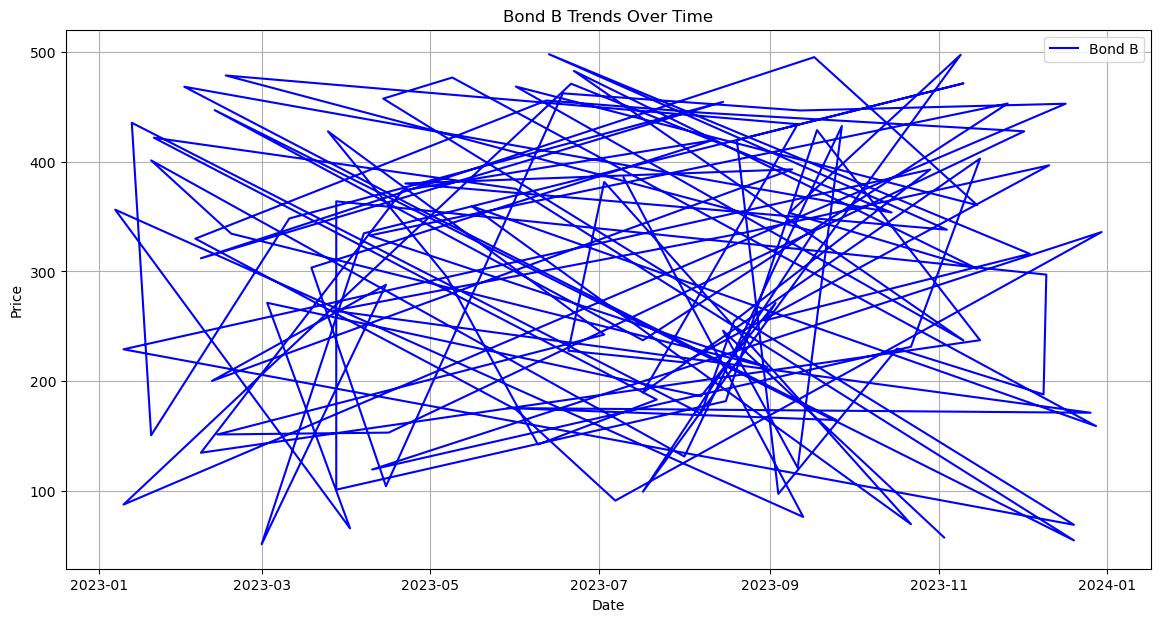

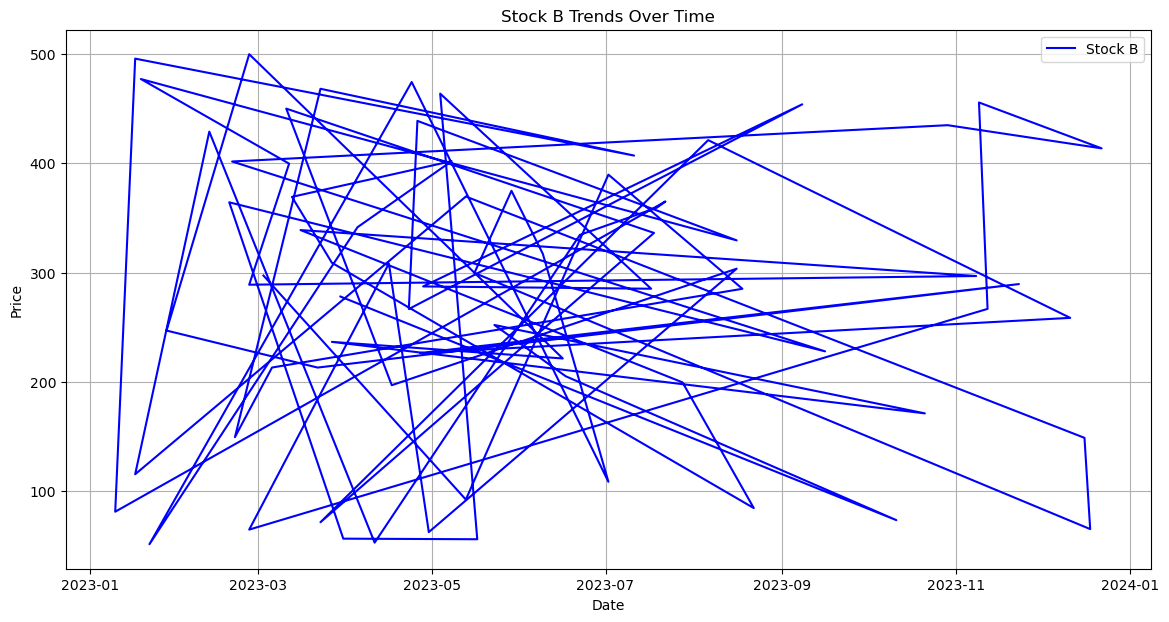

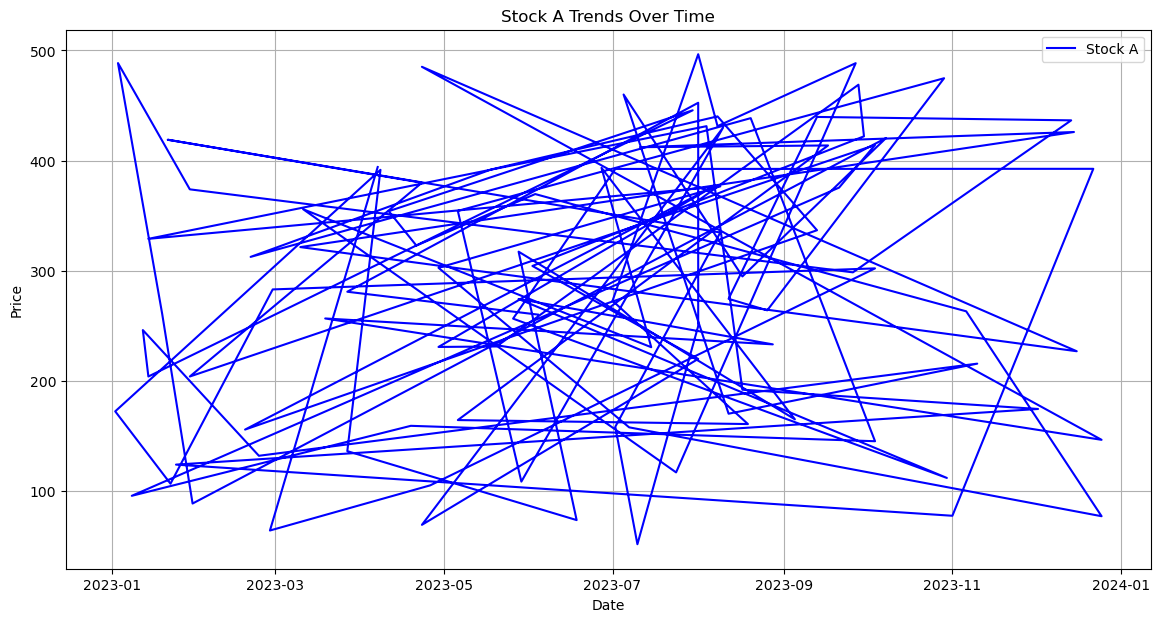

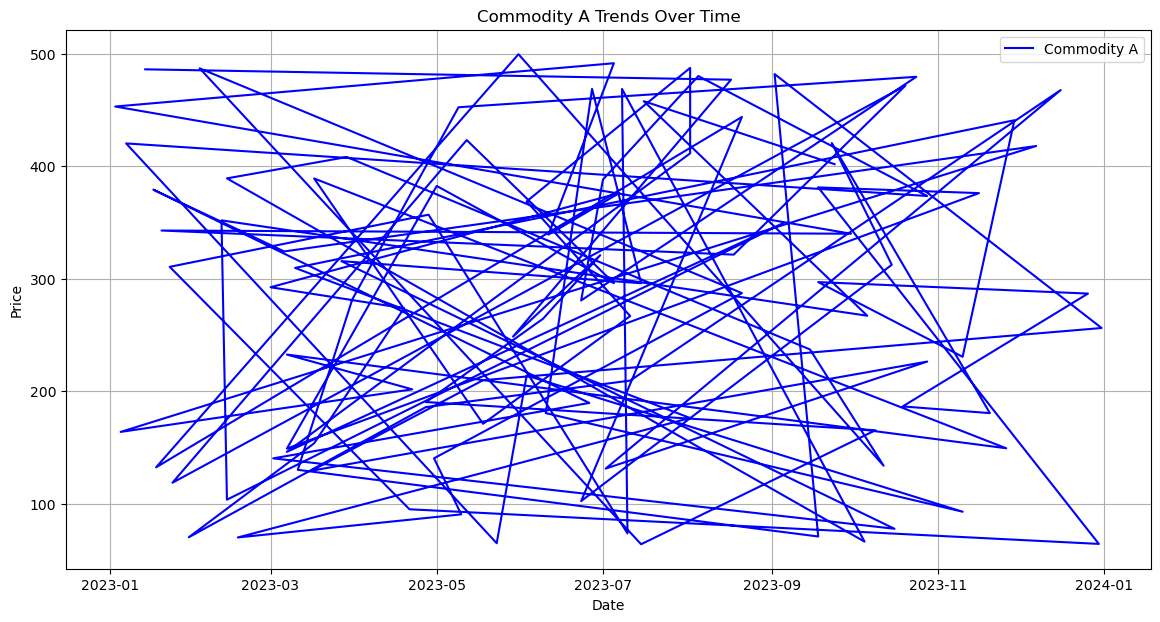

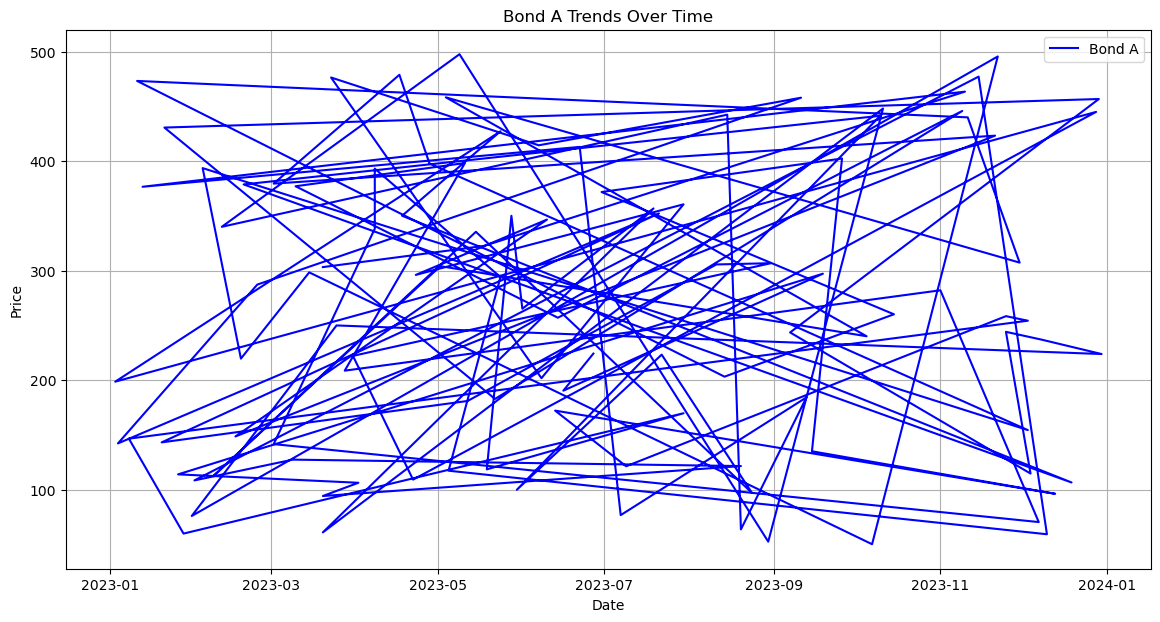

In [21]:
def visualize_trends():
    for i in asset_data.keys():
        plt.figure(figsize=(14, 7))
        plt.plot(asset_data[i]['Date'], asset_data[i]['Price'], label=i, color='blue') 
        plt.title(f'{i} Trends Over Time')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()
visualize_trends()

C:\Users\91970\AppData\Local\Temp\ipykernel_12968\3322566685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data[i]['Sales_MA_30'] = asset_data[i]['Price'].rolling(window=30).mean()


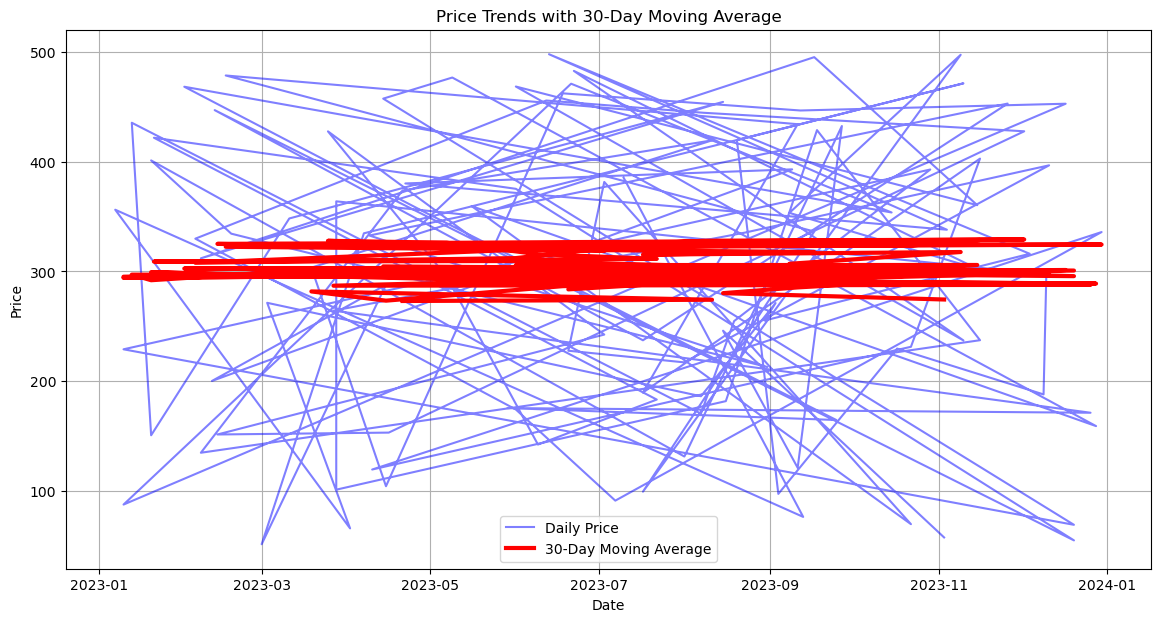

C:\Users\91970\AppData\Local\Temp\ipykernel_12968\3322566685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data[i]['Sales_MA_30'] = asset_data[i]['Price'].rolling(window=30).mean()


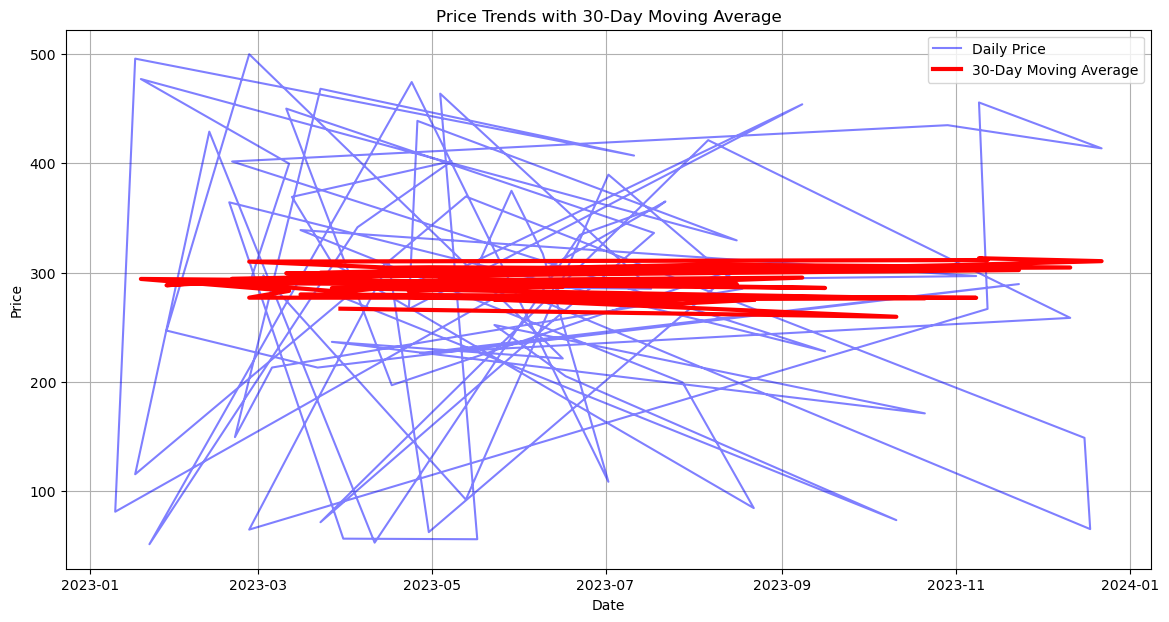

C:\Users\91970\AppData\Local\Temp\ipykernel_12968\3322566685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data[i]['Sales_MA_30'] = asset_data[i]['Price'].rolling(window=30).mean()


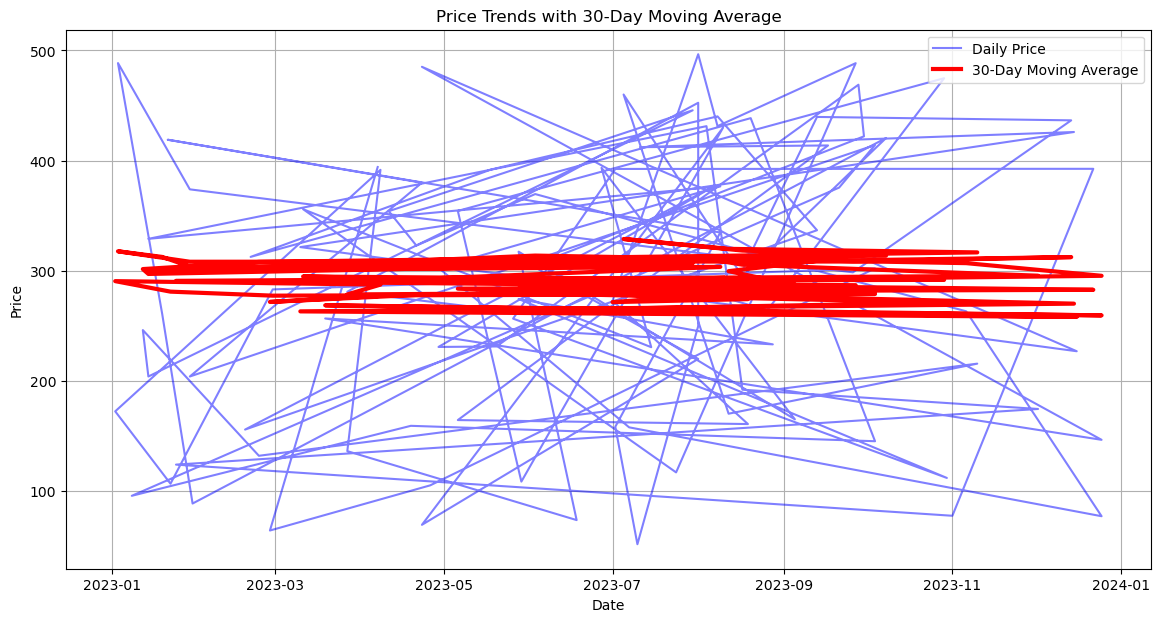

C:\Users\91970\AppData\Local\Temp\ipykernel_12968\3322566685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data[i]['Sales_MA_30'] = asset_data[i]['Price'].rolling(window=30).mean()


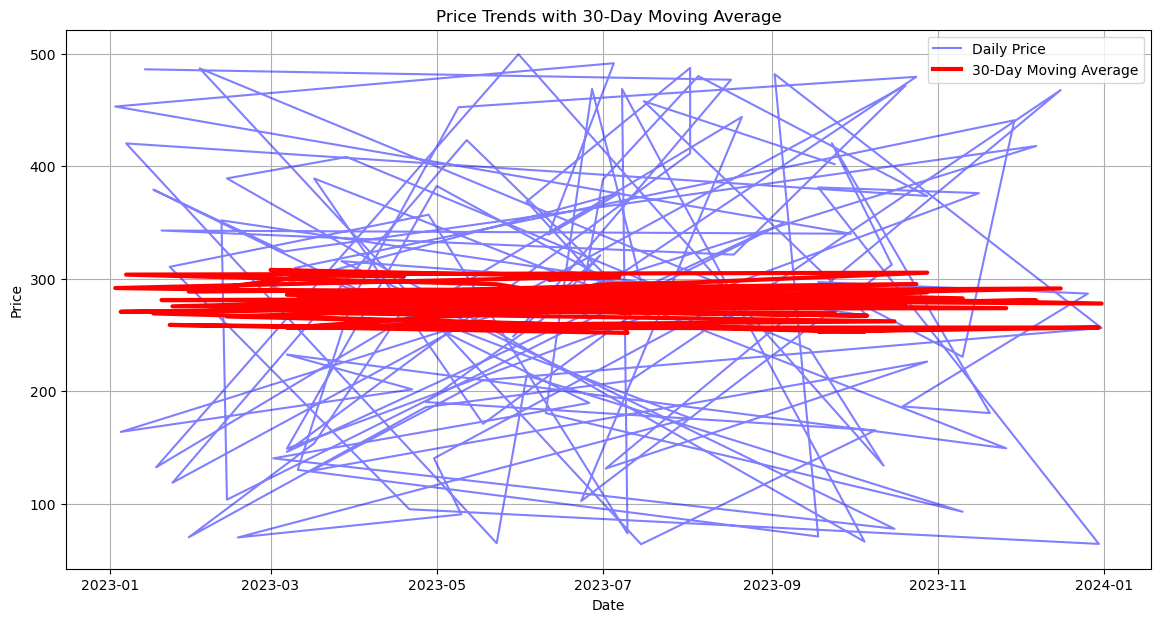

C:\Users\91970\AppData\Local\Temp\ipykernel_12968\3322566685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asset_data[i]['Sales_MA_30'] = asset_data[i]['Price'].rolling(window=30).mean()


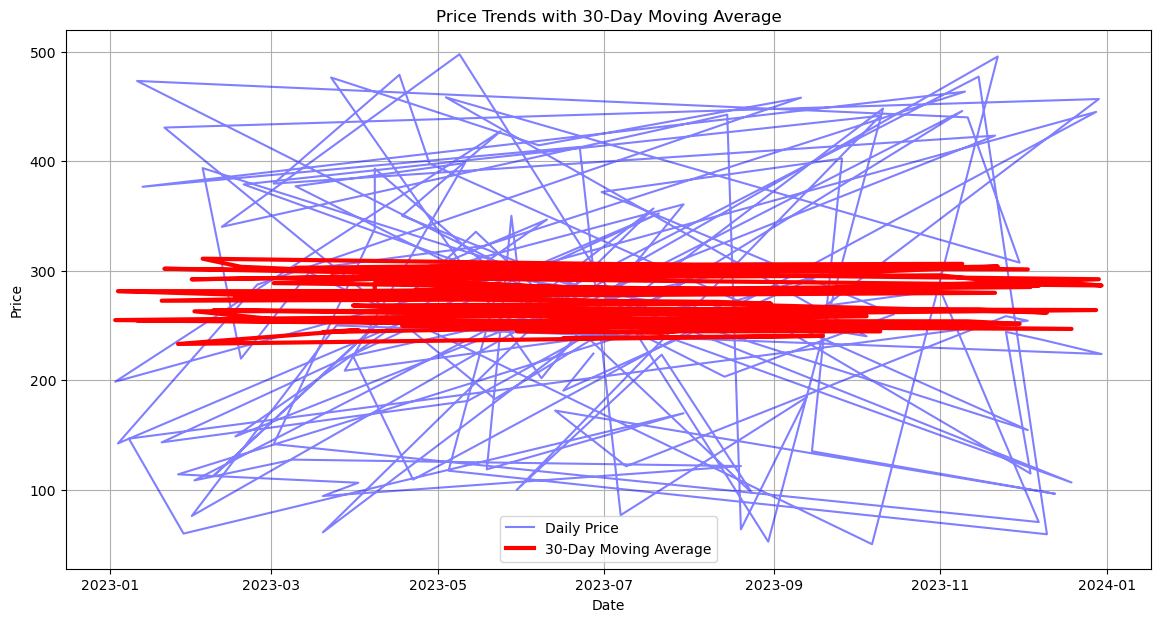

In [24]:
for i in asset_data.keys(): 
    asset_data[i]['Sales_MA_30'] = asset_data[i]['Price'].rolling(window=30).mean()  
    plt.figure(figsize=(14, 7))
    plt.plot(asset_data[i]['Date'], asset_data[i]['Price'], label='Daily Price', alpha=0.5, color='blue')
    plt.plot(asset_data[i]['Date'], asset_data[i]['Sales_MA_30'], label='30-Day Moving Average', color='red', linewidth=3)
    plt.title('Price Trends with 30-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [29]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

for i in asset_data.keys():
    print(f"\nProcessing Asset: {i}")
    
    asset_data[i] = asset_data[i].set_index('Date') if 'Date' in asset_data[i].columns else asset_data[i]
    
    series = asset_data[i]['Price'].dropna() 
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    print(f'Train size: {len(train)}, Test size: {len(test)}')

    try:
        model = ARIMA(train, order=(1, 1, 1))
        model_fit = model.fit()
        print(model_fit.summary())
        forecast = model_fit.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mape = mean_absolute_percentage_error(test, forecast)

        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')
    
    except Exception as e:
        print(f"ARIMA failed for {i} due to error: {e}")



Processing Asset: Bond B
Train size: 88, Test size: 22
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -549.910
Date:                Tue, 11 Mar 2025   AIC                           1105.820
Time:                        09:39:09   BIC                           1113.218
Sample:                             0   HQIC                          1108.799
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0480      0.125     -0.384      0.701      -0.293       0.197
ma.L1         -0.9772      0.053    -18.521      0.000      -1.081      -0.

In [30]:
forecast_results = []

for i in asset_data.keys():
    print(f"\nProcessing Asset: {i}")
    
    asset_data[i] = asset_data[i].set_index('Date') if 'Date' in asset_data[i].columns else asset_data[i]
    
    series = asset_data[i]['Price'].dropna()  # Adjust 'Price' if your column is different

    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    print(f'Train size: {len(train)}, Test size: {len(test)}')

    try:
        model = ARIMA(train, order=(1, 1, 1))
        model_fit = model.fit()

        forecast = model_fit.forecast(steps=len(test))

        rmse = np.sqrt(mean_squared_error(test, forecast))
        mape = mean_absolute_percentage_error(test, forecast)

        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

        forecast_df = pd.DataFrame({
            'Asset': i,
            'Date': test.index,
            'Actual': test.values,
            'Forecast': forecast.values,
            'RMSE': rmse,
            'MAPE': mape
        })

        forecast_results.append(forecast_df)

    except Exception as e:
        print(f"ARIMA failed for {i} due to error: {e}")

final_forecast_df = pd.concat(forecast_results, ignore_index=True)

print("\nFinal Forecast Table:")
print(final_forecast_df.head(10)) 
final_forecast_df.to_csv('forecasted_sales_by_asset.csv', index=False)



Processing Asset: Bond B
Train size: 88, Test size: 22
Root Mean Squared Error (RMSE): 135.90
Mean Absolute Percentage Error (MAPE): 87.45%

Processing Asset: Stock B
Train size: 59, Test size: 15
Root Mean Squared Error (RMSE): 115.04
Mean Absolute Percentage Error (MAPE): 63.52%

Processing Asset: Stock A
Train size: 80, Test size: 21
Root Mean Squared Error (RMSE): 139.20
Mean Absolute Percentage Error (MAPE): 82.98%

Processing Asset: Commodity A
Train size: 84, Test size: 22
Root Mean Squared Error (RMSE): 115.93
Mean Absolute Percentage Error (MAPE): 45.41%

Processing Asset: Bond A
Train size: 87, Test size: 22
Root Mean Squared Error (RMSE): 134.40
Mean Absolute Percentage Error (MAPE): 93.78%

Final Forecast Table:
    Asset       Date  Actual    Forecast        RMSE      MAPE
0  Bond B 2023-04-16  152.91  303.546198  135.901309  0.874484
1  Bond B 2023-02-13  151.20  309.519908  135.901309  0.874484
2  Bond B 2023-07-03  242.38  309.232989  135.901309  0.874484
3  Bond B 202

#### Predicting Heart Disease

In [34]:
og_data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data = og_data
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [35]:
# Z-score Normalization
cols_to_standardize = ['age', 'resting bp s', 'cholesterol', 'max heart rate']

for col in cols_to_standardize:
    data[col] = (data[col] - data[col].mean()) / data[col].std()
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.466111,1,2,0.427149,0.775348,0,0,1.264507,0,0.0,1,0
1,-0.504388,0,3,1.515950,-0.299386,0,0,0.637490,0,1.0,2,1
2,-1.786686,1,2,-0.117252,0.716188,0,1,-1.635448,0,0.0,1,0
3,-0.611246,0,4,0.318269,0.035852,0,0,-1.243562,1,1.5,2,1
4,0.029902,1,3,0.971549,-0.151487,0,0,-0.694922,0,0.0,1,0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Confusion Matrix:
 [[ 92  20]
 [ 18 108]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       112
           1       0.84      0.86      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

Accuracy: 84.03%
